### ¿Cómo funciona la suspensión de un auto?
> Una primer aproximación al modelo de la suspensión de un automovil es considerar el oscilador armónico amortiguado. El cual se representa a través de la siguiente ecuación diferencial. 

\begin{equation}
m\ddot{x} + k x + B \dot{x} = 0
\end{equation}
donde $k$ es la constante del muelle, y $B$ la constante de amortiguación. 

Referencia: 
   - https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html
   - https://docs.scipy.org/doc/scipy/reference/index.html

___
<div>
<img style="float: left; margin: 0px 0px 15px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg/414px-Packard_wishbone_front_suspension_%28Autocar_Handbook%2C_13th_ed%2C_1935%29.jpg" width="150px" height="50px" />

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/df/Radaufhängung_Renault.JPG" width="150px" height="100px" />

 </div>

Esta es una ecuación diferencial ordinaria (EDO). En python existe una función llamada _odeint_ del paquete _integrate_ de la libreria _scipy_, que permite integrar sistemas del tipo 
\begin{equation}
\frac{dy}{dt} = f(x,y)
\end{equation}
con condiciones iniciales $y(0) = y_{0}$. Ahora bien, si nos fijamos bien, la ecuación diferencial que tenemos es de segundo orden. No hay problema. La podemos simplificar como un sistema de ecuaciones de primer orden como sigue:

\begin{align}
\dot{x} & = y \\
\dot{y} & = -\frac{k}{m} x - \frac{B}{m} y  
\end{align}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint 
%matplotlib inline

In [2]:
k = 3.0 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

def armonico(variables, t):
    x, y = variables
    return [y, -k * x / m - B / m * y]

inicial = [0.6, 0.4] # Vector de posición inicial y velocidad inicial
# condiciones iniciales x(t=0)=0.6 [m] y(t=0)=0.4 [m/s]

#tiempo = np.linspace(0, 15)  # Dominio temporal de 0 a 15 
tiempo = np.arange(0, 20, .01)

resultado = odeint(armonico, inicial, tiempo) 
#El sistema se resuelve  con 
#odeint(sistema, condiciones iniciales, rango donde graficaremos)

In [3]:
xx, yy = resultado.T  # extraer posición y velocidad. 

In [4]:
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

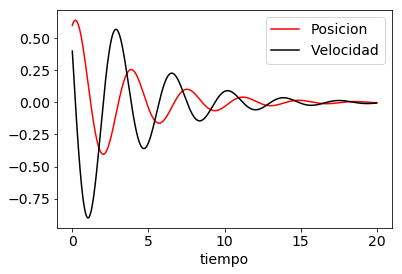

In [5]:
plt.plot(tiempo, xx, c = 'r', label="Posicion") 
plt.plot(tiempo, yy, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

In [361]:
omega0 = k/m

In [7]:
plt.figure(figsize = (6,6))
plt.scatter(xx, yy/omega0, lw = 0, s = 3, cmap = 'viridis', c = xx)
plt.show()

NameError: name 'omega0' is not defined

In [363]:
from ipywidgets import *

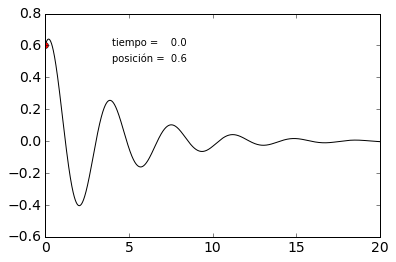

In [364]:
def amortiguado(t = 0):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(tiempo, xx,  'k-')
    ax.plot(tiempo[t], xx[t],  'ro')
    ax.text(4, .6, 'tiempo =    %s'%tiempo[t])
    ax.text(4, .5, 'posición =  %s'%xx[t])
    fig.canvas.draw()
t_f = len(tiempo) 
interact_manual(amortiguado, t = (0, t_f, 1));

### Casos

Teníamos
\begin{equation}
m\ddot{x} + k x + B \dot{x} = 0
\end{equation}

si recordamos que $\omega_0 ^2 = k/m$ y definimos $B/m\equiv 2\Gamma$, tendremos

\begin{equation}
\ddot{x} + 2\Gamma \dot{x}+ \omega_0^2 x = 0
\end{equation}

### Amortiguado

Si $\omega_0^2 > \Gamma^2$ se tiene movimiento oscilatorio amortiguado. 

In [365]:
omega0 = k/m
Gamma = B/(2*m)

In [366]:
omega0**2, Gamma**2

(9.0, 0.0625)

In [367]:
omega0**2 > Gamma**2

True

Entonces, el primer caso que ya habíamos presentado corresponde a movimiento amortiguado. 

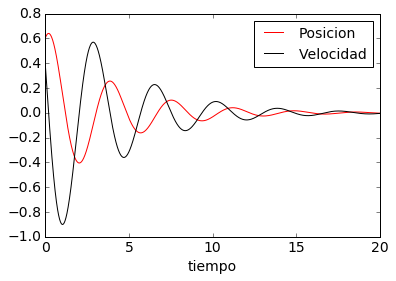

In [376]:
plt.plot(tiempo, xx, c = 'r', label="Posicion") 
plt.plot(tiempo, yy, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

### Sobreamortiguado

Si $\omega_0^2 < \Gamma^2$ se tiene movimiento oscilatorio amortiguado. 

In [330]:
k = .1 # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [331]:
omega0 = k/m
Gamma = B/(2*m)

In [332]:
omega0**2, Gamma**2

(0.010000000000000002, 0.0625)

In [333]:
omega0**2 < Gamma**2

True

In [334]:
inicial = [0.6, 0.4] 
tiempo = np.arange(0, 20, .01)
resultado = odeint(armonico, inicial, tiempo) 

In [335]:
xxA, yyA = resultado.T  # extraer posición y velocidad. 

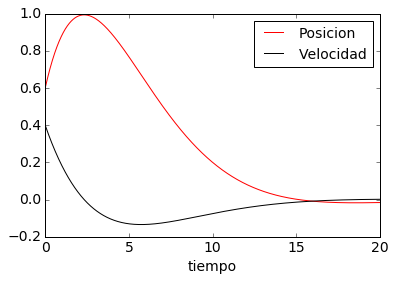

In [377]:
plt.plot(tiempo, xxA, c = 'r', label="Posicion") 
plt.plot(tiempo, yyA, c = 'k', label="Velocidad")
plt.legend(loc = 'best', prop={'size': 14})    
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

### Amortiguamiento crítico

Si $\omega_0^2 = \Gamma^2$ se tiene movimiento aperiódico crítico (amortiguamiento crítico). 

In [378]:
k = np.sqrt(.0625) # Constante del muelle
m = 1.0   # Masa
B = .5 # Constante de amortiguación

In [379]:
omega0 = k/m
Gamma = B/(2*m)

In [380]:
omega0**2, Gamma**2

(0.0625, 0.0625)

In [381]:
omega0**2 == Gamma**2

True

In [382]:
inicial = [0.6, 0.4] 
tiempo = np.arange(0, 20, .01)
resultado = odeint(armonico, inicial, tiempo) 

In [383]:
xxC, yyC = resultado.T  # extraer posición y velocidad. 

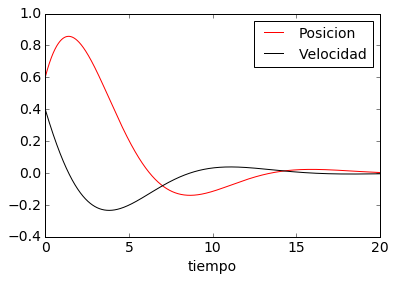

In [385]:
plt.plot(tiempo, xxC, c = 'r', label="Posicion") 
plt.plot(tiempo, yyC, c = 'k', label="Velocidad")
plt.legend(loc = 'best',prop={'size': 14})  
plt.xlabel('tiempo', fontsize = 14) 
plt.show()

En resumen, se tiene entonces: 

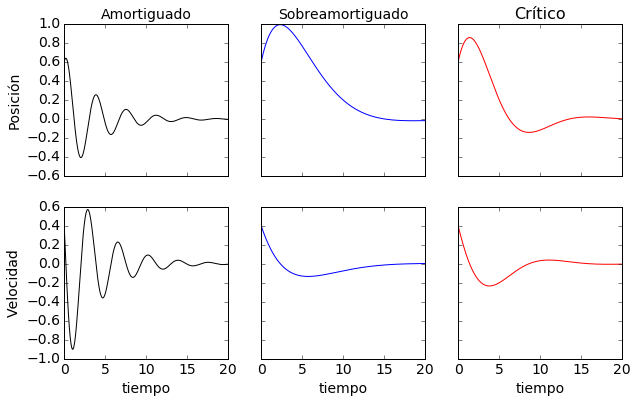

In [386]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col',
                                                       sharey='row',figsize =(10,6))
ax1.plot(tiempo, xx, c = 'k') 
ax1.set_title('Amortiguado', fontsize = 14)
ax1.set_ylabel('Posición', fontsize = 14)
ax2.plot(tiempo, xxA, c = 'b') 
ax2.set_title('Sobreamortiguado', fontsize = 14)
ax3.plot(tiempo, xxC, c = 'r') 
ax3.set_title('Crítico', fontsize = 16)
ax4.plot(tiempo, yy, c = 'k')
ax4.set_ylabel('Velocidad', fontsize = 14)
ax4.set_xlabel('tiempo', fontsize = 14)
ax5.plot(tiempo, yyA, c = 'b')
ax5.set_xlabel('tiempo', fontsize = 14)
ax6.plot(tiempo, yyC, c = 'r')
ax6.set_xlabel('tiempo', fontsize = 14)
plt.show()

> **Actividad**. ¿Cómo se ve el espacio fase para los diferentes casos así como para diferentes condiciones iniciales? 

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Juan Carlos Martínez.
</footer>